# Lillian Jiang - Proj3 Can Thermal Radiation Account for the Cluster findings?

## <font color = red> Grade 19.8/20 ... Nicely done. just a little more attention to explanatory material needed

# Import Packages

<div class="alert alert-block alert-success">
    - This project explores the relationship between thermal radiation and cluster findings through a theoretical tool - the Planck Function.

## <font color = red> yes, but add some more details. what relation did you find for the cluster and why does the planck function offer a possible explanation?

In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt          #matplotlib enables plotting routines

## <font color = red> briefly state what the data is and your definition of color

In [2]:
cluster = np.loadtxt("cluster.txt")
cluster_b = cluster[:,1]
cluster_v = cluster[:,2]

# constants in cgs units

In [3]:
#The Planck Constant
h = 6.626 * 10**(-27)  #erg*sec

#The Boltzmann Constant
k = 1.381 * 10**(-16)  #erg/K

#Speed of light
c = 2.998 * 10**(10)   #cm/sec

# enter temp, lambda

In [4]:
temp = np.arange(2000, 20000, 2000)         
#in nm unit
lambdaRange_nm = np.arange(100,1250,10)
#lambdaRange_nm = np.array([440,550])
#convert into cm
lambdaRange_cm = lambdaRange_nm*(1e-7)

## <font color = red> what is meshgrid and why are you using it?

In [5]:
Temp, WaveRange = np.meshgrid(temp,lambdaRange_cm)    

# Calculate Planck

## Planck Function

<font color=red>

##  $  B(\lambda,T)~d{\lambda}~=~ {2 h c^2 \over \lambda^5}~ {1\over
\exp({h c \over \lambda k T}) -1}~~d{\lambda}   $
</font>

## <font color=blue> say what $  B(\lambda,T)$ is, and what its units are </font>

In [6]:
calc_top = 2*h*c**2
expo = (h*c)/(WaveRange*k*Temp)
calc_bot = (WaveRange**5)*(np.exp(expo)-1)
planck_result = calc_top/calc_bot

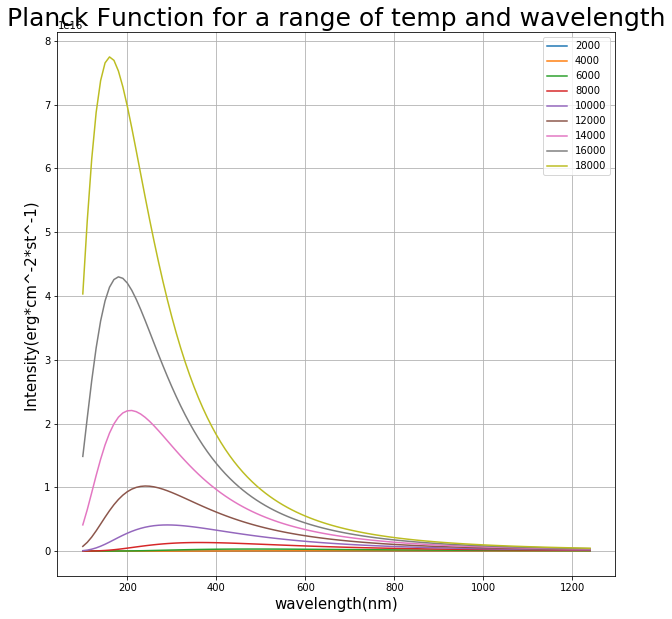

In [7]:
# plot Planck function as a function of wave for a range of temp
plt.figure(figsize=(10,10))
plt.plot(lambdaRange_nm, planck_result,'-', markersize = 15)
plt.ylabel("Intensity(erg*cm^-2*st^-1) ", size=15)
plt.xlabel("wavelength(nm)",size=15)
plt.title('Planck Function for a range of temp and wavelength', size = 25)
plt.grid()

# add legend with temp values
labels = (temp)
plt.legend(labels)
plt.show()

<div class="alert alert-block alert-success">
    
  - This graph shows a full planck function for a range of temperature and wavelength.
  - A higher temperature perfect thermal radiator tends to have higher monochromatic specific intensity from planck function.
  - Also, a higher temperature thermal radiator has smaller wavelength peaks.
  - All of them have skewness to right.

# A Comparsion of the cluster B,V data with Planck  <font color = red> at B,V

In [8]:
#re-calculate planck function for wavelength at 440nm(B fliter) and 550nm(V fliter)
temp = np.arange(2000, 20000, 200)         
#in nm unit
lambdaRange_nm = np.array([440,550])
#convert into cm
lambdaRange_cm = lambdaRange_nm*(1e-7)

Temp, WaveRange = np.meshgrid(temp,lambdaRange_cm)    

calc_top = 2*h*c**2
expo = (h*c)/(WaveRange*k*Temp)
calc_bot = (WaveRange**5)*(np.exp(expo)-1)
planck_result = calc_top/calc_bot

In [9]:
# calculate B/V for planck
bv_ratio = planck_result[0]/planck_result[1]

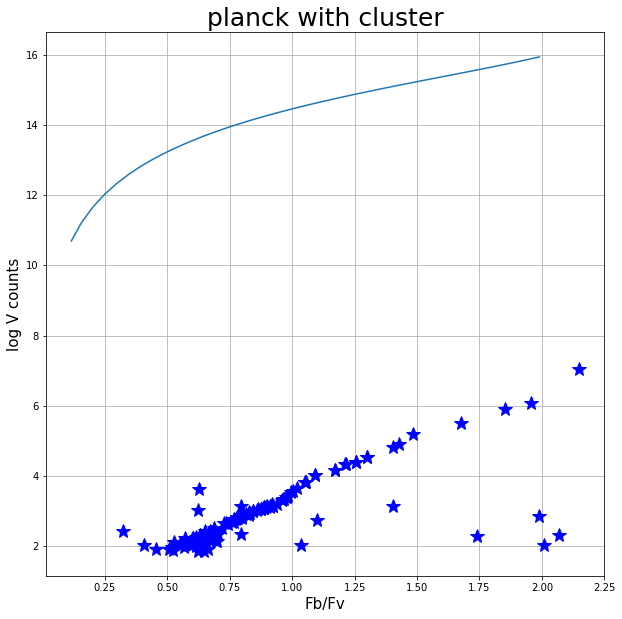

In [10]:
# calculate B/V for cluster
bv_ratio_cluster = cluster_b/cluster_v

# plot Planck function as a function of wave for each temp
plt.figure(figsize=(10,10))
plt.plot(bv_ratio, np.log10(planck_result[1]),'-', markersize = 15, label=['planck result'])
plt.plot(bv_ratio_cluster, np.log10(cluster_v),'b*', markersize = 15)
plt.ylabel("log V counts", size=15)
plt.xlabel("Fb/Fv",size=15)
plt.title('planck with cluster', size = 25)
plt.grid()

<div class="alert alert-block alert-success">
    
  - This graph compares planck function to cluster B,V data.
  - They both have similar growth rate. With the b/v ratio increases, which means the stars being bluer, the brighter the stars are in V fliter.

<font color=blue>
    
   - There is a problem assoicated with the graph. The y axis for planck function is intensity unit, while the y-axis for counts is the proprotional brightness. They need to be normalized at b/v=1. In the following, we are going to find the nearest value associated with b/v = 1 in both data.

# Normalization 

In [11]:
#find the value assoicated with b/v = 1 in planck function
minvalue = 1
index = 0
for x in range(len(bv_ratio)):
    if (abs(1 - bv_ratio[x]) < minvalue):
        minvalue = 1 - bv_ratio[x]
        index = x
planck_v = planck_result[1]
planck1 = planck_v[index];
print("The nearest planck value assoicated with b/v = 1 is", planck1)

The nearest planck value assoicated with b/v = 1 is 306678278611852.4


In [12]:
#find the value assoicated with b/v = 1 in cluster 
minvalue = 1
index = 0
for x in range(len(bv_ratio_cluster)):
    if (abs(1 - bv_ratio_cluster[x]) < minvalue):
        minvalue = 1 - bv_ratio_cluster[x]
        index = x
cluster1 = cluster_v[index]
print("The nearest cluster V counts assoicated with b/v = 1 is" ,cluster1)

The nearest cluster V counts assoicated with b/v = 1 is 3600.0


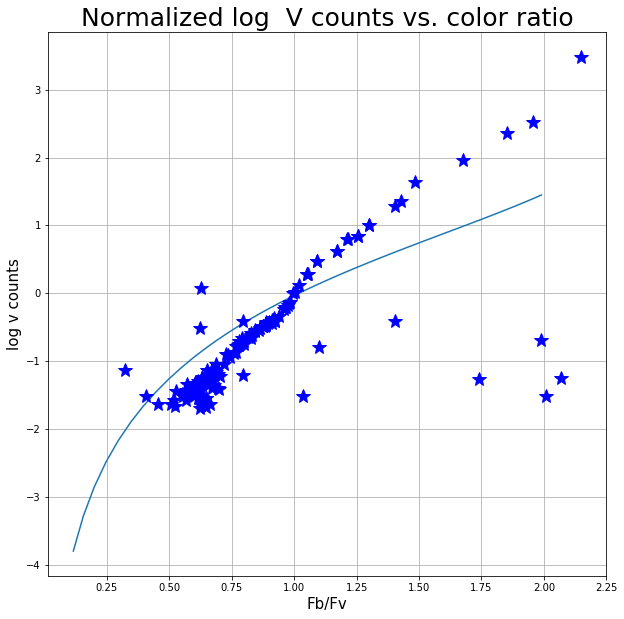

In [13]:
#Normalization with log
plt.figure(figsize=(10,10))
plt.plot(bv_ratio, np.log10(planck_result[1]/planck1),'-', markersize = 15)
plt.plot(bv_ratio_cluster, np.log10(cluster_v/cluster1),'b*', markersize = 15)
plt.ylabel("log v counts", size=15)
plt.xlabel("Fb/Fv",size=15)
plt.title('Normalized log  V counts vs. color ratio', size = 25)
plt.grid()

<div class="alert alert-block alert-success">
    
  - This graph compares planck function to cluster B,V data, with normalization.
  - They merge at b/v = 1, which is the point we choose to normalize. On the leftside of b/v, V counts for cluster data are smaller than planck. The largest gap is around 0.3(log v counts). On the rightside, V counts for cluster are larger than planck, and the gap is growing. The largest gap is around 1 (log v counts).
  - This shows some interesting differences between perfect thermal radiators and cluster. When a star is bluer, the stars are brighter in V counts than expectation, vice versa. 

<font color=blue>
    
   - One thing to keep in mind is that Planck function is based on constant distance, and stars are perfect thermal radiators ## <font color = red> you don't know that based on this data </font>. Also, planck function is for per unit. <font color=red> per unit what? </font> The cluster stars <font color=red> MAY </font> have different size.
   - Therefore, We have a specluation that the gap is caused by size. The hotter stars tend to be bluer and bigger. The cooler stars tend to be redder and smaller.

<div class="alert alert-block alert-success">
    
   - We also inspected that the gap might caused by Doppler shift. 
   - $\Delta \lambda$ = 100 nm, $\lambda$ = 440nm 
   - Calculated out based on equation $\Delta \lambda$ = $\lambda$obs - $\lambda$est, $\frac{Vr}{c}$ = $\frac{\Delta \lambda }{\lambda}$
   - We estimated the result of $\frac{Vr}{C}$ to be around 0.1, which means the stars rotates at 10% of light speed. It is impossible for a star to rotate in such fast speed. Therefore, we eliminate the possibility that the gap is caused by Doppler Shift.